# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('data/employees.csv', ';')
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary,Unnamed: 7
0,Jose,IT,Bachelor,M,analyst,1,35,NaN
1,Maria,IT,Master,F,analyst,2,30,NaN
2,David,HR,Master,M,analyst,2,30,NaN


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [28]:
# Method 1
# your code here
employees.groupby('Department').agg({'Salary':'mean'}).reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [29]:
# Method 2
# your code here
employees.pivot_table(index='Department', aggfunc={'Salary':np.mean}).reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [30]:
# your code here
employees.pivot_table(index=['Department', 'Title'], aggfunc={'Salary':np.mean}).reset_index()

,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [31]:
# your code here
employees.pivot_table(index='Title', columns='Years').T.reset_index()

Title,level_0,Years,VP,analyst,associate
0,Salary,1,NaN,35.0,NaN
1,Salary,2,NaN,30.0,55.0
2,Salary,3,NaN,NaN,55.0
3,Salary,4,NaN,35.0,NaN
4,Salary,7,NaN,NaN,60.0
5,Salary,8,70.0,NaN,NaN


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [32]:
# your code here
employees.pivot_table(index='Title', aggfunc={'Salary':'mean',
                                               'Department':'count'}).reset_index()

,Title,Department,Salary
0,VP,2,70.000000
1,analyst,4,32.500000
2,associate,3,56.666667


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [33]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['median', 'min', 'max', 'std']).reset_index()

,Department,Title,median,min,max,std
,,,Salary,Salary,Salary,Salary
0,HR,VP,70.0,70,70,NaN
1,HR,analyst,32.5,30,35,3.535534
2,IT,VP,70.0,70,70,NaN
3,IT,analyst,32.5,30,35,3.535534
4,IT,associate,60.0,60,60,NaN
5,Sales,associate,55.0,55,55,0.000000


In [ ]:
"""
your commments here
Most titles have the same value for min, max and median, with zero as std. 
In other words there is no variation in Salary.
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [25]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['median', 'min', 'max', 'std'], fill_value='median')

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [34]:
# your code here
employees.pivot_table(index='Department', aggfunc={'Name':'count', 'Salary':'sum'}).reset_index()

,Department,Name,Salary
0,HR,3,135
1,IT,4,195
2,Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [35]:
# your code here
employees.pivot_table(index=['Department', 'Title'], aggfunc={'Years':'sum', 'Salary':'mean'}).reset_index()

,Department,Title,Salary,Years
0,HR,VP,70.0,8
1,HR,analyst,32.5,6
2,IT,VP,70.0,8
3,IT,analyst,32.5,3
4,IT,associate,60.0,7
5,Sales,associate,55.0,5


## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [37]:
# your code here
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [40]:
# your code here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [43]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062606

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [44]:
import matplotlib.pyplot as plt;

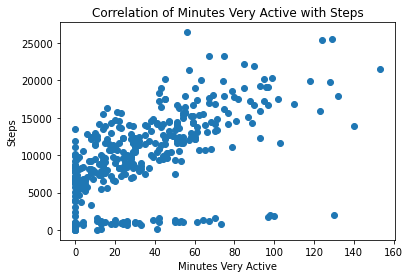

In [48]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title(label='Correlation of Minutes Very Active with Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
The number of steps decrease as the minutes increase
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [49]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990097

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

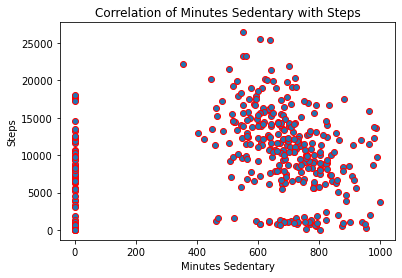

In [52]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'], edgecolors='red')
plt.title(label='Correlation of Minutes Sedentary with Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
With zero minutes sedentary, we have an increasing number of steps.
Around 600 to 800 minutes sedentary, we have a surprisingly high number os steps
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [53]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836388

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

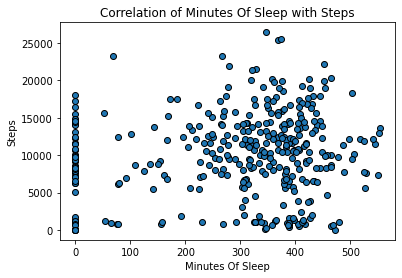

In [55]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'], edgecolors='k')
plt.title(label='Correlation of Minutes Of Sleep with Steps')
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [69]:
# your code here
cor_fit = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [74]:
# your code here
cor_fit.sort_values(by='Steps')

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [76]:
# your code here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

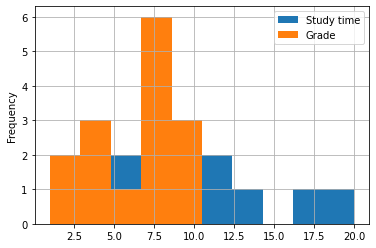

In [82]:
# your code here
time_grades.plot.hist(grid=True)
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [88]:
# your code here
time_grades['Study time'].corr(time_grades['Grade'], method='pearson')

0.7980456073578858

In [84]:
time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

0.819658753036942

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""